# Libraries

In [108]:
!pip install -q -r requirements.txt

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import xgboost as xgb

# Read Data

In [110]:
df_train = pd.read_csv('data/Dataset_Treino.csv')
df_train.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1650,20,public,Cursando o 3º ano do Ensino Médio,SP,Ubatuba,Não,Não,Nunca realizei um curso a distância,Não sei dizer,...,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Instagram,Noite,08/10/2022,0.0,100,1
1,771,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Não sei dizer,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Programa de televisão,Manhã,26/09/2022,6.0,112,0
2,503,22,public,Cursando o 3º ano do Ensino Médio,RJ,Queimados,Sim,Não,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Site de notícias,Já concluí,23/09/2022,0.0,115,1
3,1586,19,public,Cursando o 3º ano do Ensino Médio,SP,Mogi das Cruzes,Não,Não,Sim e fiz totalmente pelo computador,Eu prefiro cursos presenciais,...,Sim,Sim,4,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,07/10/2022,0.0,101,1
4,2381,17,scholarship,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Sim e fiz totalmente pelo computador,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,4,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Facebook,Manhã,24/10/2022,6.0,84,1


In [111]:
df_test = pd.read_csv('data/Dataset_Resposta.csv') 
df_test.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio
0,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,Computador,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123
1,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123
2,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123
3,6,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Sim,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio,Sim,Sim,2,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Outros,Já concluí,15/09/2022,82.0,123
4,13,18,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Não sei dizer,Celular próprio/Internet wifi/Internet 4G,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,0.0,123


# EDA

In [112]:
df_train.shape

(2500, 21)

In [113]:
df_train['Abandono_curso'].value_counts(normalize=True)

Abandono_curso
1    0.7248
0    0.2752
Name: proportion, dtype: float64

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Aluno                 2500 non-null   int64  
 1   Idade                    2500 non-null   int64  
 2   Tipo_escola              2500 non-null   object 
 3   Escolaridade             2500 non-null   object 
 4   Estado                   2500 non-null   object 
 5   Municipio                2495 non-null   object 
 6   Trabalhando              2500 non-null   object 
 7   Estudando                2496 non-null   object 
 8   Concluiu_EAD             2500 non-null   object 
 9   Aprender_EAD             2500 non-null   object 
 10  Recursos                 2498 non-null   object 
 11  Disponibilidade_Tutoria  2500 non-null   object 
 12  Disponibilidade_3_Meses  2500 non-null   object 
 13  Pessoas_Casa             2500 non-null   object 
 14  Renda_Familiar          

In [115]:
df_train.nunique()

ID_Aluno                   2500
Idade                         9
Tipo_escola                   2
Escolaridade                  5
Estado                        4
Municipio                   283
Trabalhando                   2
Estudando                     2
Concluiu_EAD                  5
Aprender_EAD                  4
Recursos                     51
Disponibilidade_Tutoria       2
Disponibilidade_3_Meses       2
Pessoas_Casa                 11
Renda_Familiar                6
Conheceu_PROA                21
Horario_Estudando             5
Data_Inscrição               94
Dias_Espera_Aprovacao        65
Dias_Espera_Inicio           94
Abandono_curso                2
dtype: int64

In [116]:
df_train.isnull().sum()

ID_Aluno                   0
Idade                      0
Tipo_escola                0
Escolaridade               0
Estado                     0
Municipio                  5
Trabalhando                0
Estudando                  4
Concluiu_EAD               0
Aprender_EAD               0
Recursos                   2
Disponibilidade_Tutoria    0
Disponibilidade_3_Meses    0
Pessoas_Casa               0
Renda_Familiar             0
Conheceu_PROA              0
Horario_Estudando          0
Data_Inscrição             0
Dias_Espera_Aprovacao      0
Dias_Espera_Inicio         0
Abandono_curso             0
dtype: int64

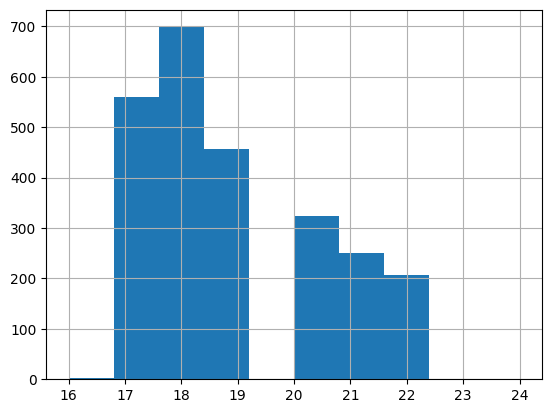

In [117]:
df_train.Idade.hist();

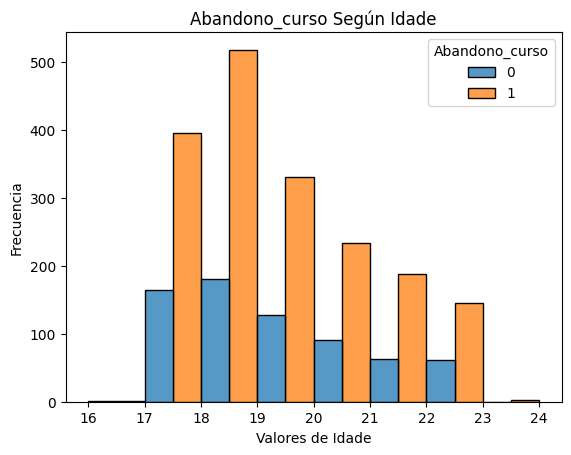

In [118]:
# Asumiendo que 'columna_ejemplo' es la columna que quieres analizar
sns.histplot(data=df_train, x='Idade', hue='Abandono_curso', multiple='dodge', binwidth=1)
plt.title('Abandono_curso Según Idade')
plt.xlabel('Valores de Idade')
plt.ylabel('Frecuencia')
plt.show()


In [119]:
print(df_train[df_train['Abandono_curso'] == 1]['Idade'].mean())
print(df_train[df_train['Abandono_curso'] == 0]['Idade'].mean())

print(df_train[df_train['Abandono_curso'] == 1]['Idade'].std())
print(df_train[df_train['Abandono_curso'] == 0]['Idade'].std())

18.857615894039736
18.843023255813954
1.5589404613532594
1.5864448144784613


In [120]:
df_train['Adulto'] = df_train['Idade'].apply(lambda x: 1 if x >= 18 else 0)

In [121]:
df_train.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Adulto
0,1650,20,public,Cursando o 3º ano do Ensino Médio,SP,Ubatuba,Não,Não,Nunca realizei um curso a distância,Não sei dizer,...,Sim,3,Até 1 salário mínimo (até R$1.100),Instagram,Noite,08/10/2022,0.0,100,1,1
1,771,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Não sei dizer,...,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Programa de televisão,Manhã,26/09/2022,6.0,112,0,0
2,503,22,public,Cursando o 3º ano do Ensino Médio,RJ,Queimados,Sim,Não,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,3,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Site de notícias,Já concluí,23/09/2022,0.0,115,1,1
3,1586,19,public,Cursando o 3º ano do Ensino Médio,SP,Mogi das Cruzes,Não,Não,Sim e fiz totalmente pelo computador,Eu prefiro cursos presenciais,...,Sim,4,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,07/10/2022,0.0,101,1,1
4,2381,17,scholarship,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Sim e fiz totalmente pelo computador,Muito eu tenho uma rotina definida para partic...,...,Sim,4,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Facebook,Manhã,24/10/2022,6.0,84,1,0


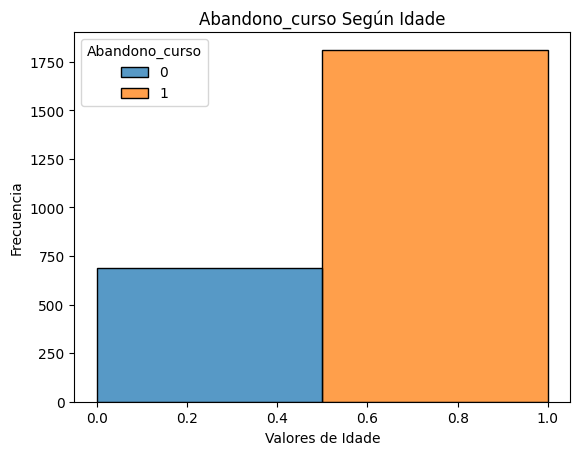

In [122]:
# Asumiendo que 'columna_ejemplo' es la columna que quieres analizar
sns.histplot(data=df_train, x='Adulto', hue='Abandono_curso', multiple='dodge', binwidth=1)
plt.title('Abandono_curso Según Idade')
plt.xlabel('Valores de Idade')
plt.ylabel('Frecuencia')
plt.show()

In [123]:
# df_train['Ingresso_per_capita'] = df_train['Renda_Familiar']/df_train['Pessoas_Casa']
# df_train.head()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Cursando o 3º ano do Ensino Médio'),
  Text(1, 0, 'Cursando o Ensino Superior'),
  Text(2, 0, 'Ensino Médio concluído e não estudando'),
  Text(3, 0, 'Ensino Médio concluído'),
  Text(4, 0, 'Ensino Superior concluído')])

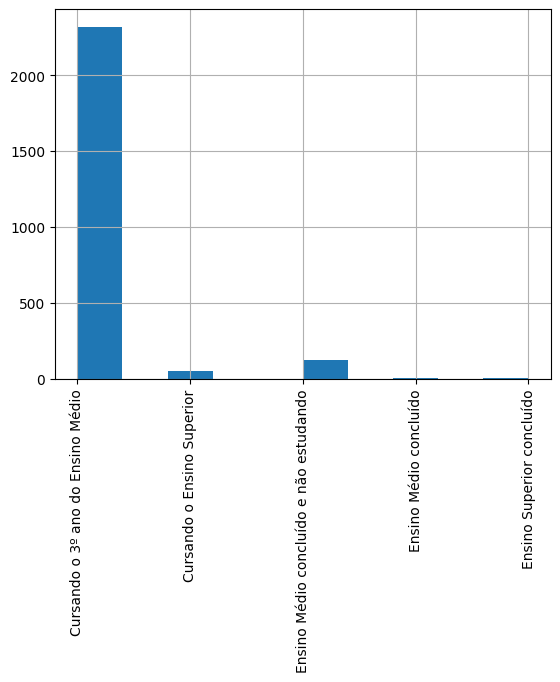

In [124]:
df_train.Escolaridade.hist()
plt.xticks(rotation=90)


In [125]:
df_train[df_train.isnull().any(axis=1)]

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Adulto
857,254,20,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Não sei dizer,...,Sim,2,Até 1 salário mínimo (até R$1.100),Divulgação do iFood,Noite,21/09/2022,0.0,117,1,1
994,2725,17,public,Cursando o 3º ano do Ensino Médio,SP,NaN,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,2,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Outros,Integral,27/10/2022,10.0,81,1,0
1039,5305,17,public,Cursando o 3º ano do Ensino Médio,SP,NaN,Não,Sim,Ainda não concluí um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),ETEC ou cursos do Centro Paula Souza,Já concluí,17/12/2022,0.0,30,1,0
1056,1000,18,public,Cursando o 3º ano do Ensino Médio,SP,NaN,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Eu prefiro cursos presenciais,...,Sim,2,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Outros,Integral,27/09/2022,3.0,111,0,1
1338,2242,19,public,Cursando o 3º ano do Ensino Médio,RJ,NaN,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,...,Sim,4,Até 1 salário mínimo (até R$1.100),Facebook,Já concluí,21/10/2022,0.0,87,1,1
1481,1790,19,public,Cursando o 3º ano do Ensino Médio,RJ,Nova Iguaçu,Não,NaN,Nunca realizei um curso a distância,Não sei dizer,...,Sim,5,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,11/10/2022,0.0,97,1,1
1534,3065,17,public,Cursando o 3º ano do Ensino Médio,RS,Porto Alegre,Não,NaN,Sim e fiz parcialmente pelo computador e parci...,Quase nada,...,Sim,4,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,04/11/2022,0.0,73,1,0
1702,1730,20,public,Cursando o 3º ano do Ensino Médio,SP,Birigui,Não,NaN,Ainda não concluí um curso a distância,Não sei dizer,...,Sim,6,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,10/10/2022,0.0,98,1,1
1965,3604,17,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Sim,NaN,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação na escola,Tarde,17/11/2022,0.0,60,0,0
2457,1995,21,scholarship,Cursando o 3º ano do Ensino Médio,RS,Rio Grande,Sim,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,...,Sim,2,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Facebook,Já concluí,16/10/2022,0.0,92,1,1


In [126]:
non_numeric_columns = df_train.select_dtypes(exclude=np.number).columns.tolist()
selected_columns = [col for col in non_numeric_columns if df_train[col].nunique() < 30]
print(selected_columns)

['Tipo_escola', 'Escolaridade', 'Estado', 'Trabalhando', 'Estudando', 'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria', 'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar', 'Conheceu_PROA', 'Horario_Estudando']


In [127]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and apply label encoding
for column in selected_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

In [128]:
# # Estandarización
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_train[selected_columns])

# Normalización
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_train[selected_columns])

# Create a DataFrame with the scaled data
df_train[selected_columns] = scaled_data

In [129]:
df_train[selected_columns].head()

,Tipo_escola,Escolaridade,Estado,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando
0,0.0,0.0,1.0,0.0,0.0,0.25,0.666667,1.0,1.0,0.3,0.0,0.60,0.75
1,0.0,0.0,1.0,0.0,0.5,0.25,0.666667,1.0,1.0,0.3,0.2,0.90,0.50
2,0.0,0.0,0.0,1.0,0.0,0.25,0.333333,1.0,1.0,0.3,0.4,0.95,0.25
3,0.0,0.0,1.0,0.0,0.0,1.00,0.000000,1.0,1.0,0.4,0.2,0.60,0.25
4,1.0,0.0,1.0,0.0,0.5,1.00,0.333333,1.0,1.0,0.4,0.4,0.35,0.50


In [130]:
numeric_columns = df_train.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['ID_Aluno',
 'Idade',
 'Tipo_escola',
 'Escolaridade',
 'Estado',
 'Trabalhando',
 'Estudando',
 'Concluiu_EAD',
 'Aprender_EAD',
 'Disponibilidade_Tutoria',
 'Disponibilidade_3_Meses',
 'Pessoas_Casa',
 'Renda_Familiar',
 'Conheceu_PROA',
 'Horario_Estudando',
 'Dias_Espera_Aprovacao',
 'Dias_Espera_Inicio',
 'Abandono_curso',
 'Adulto']

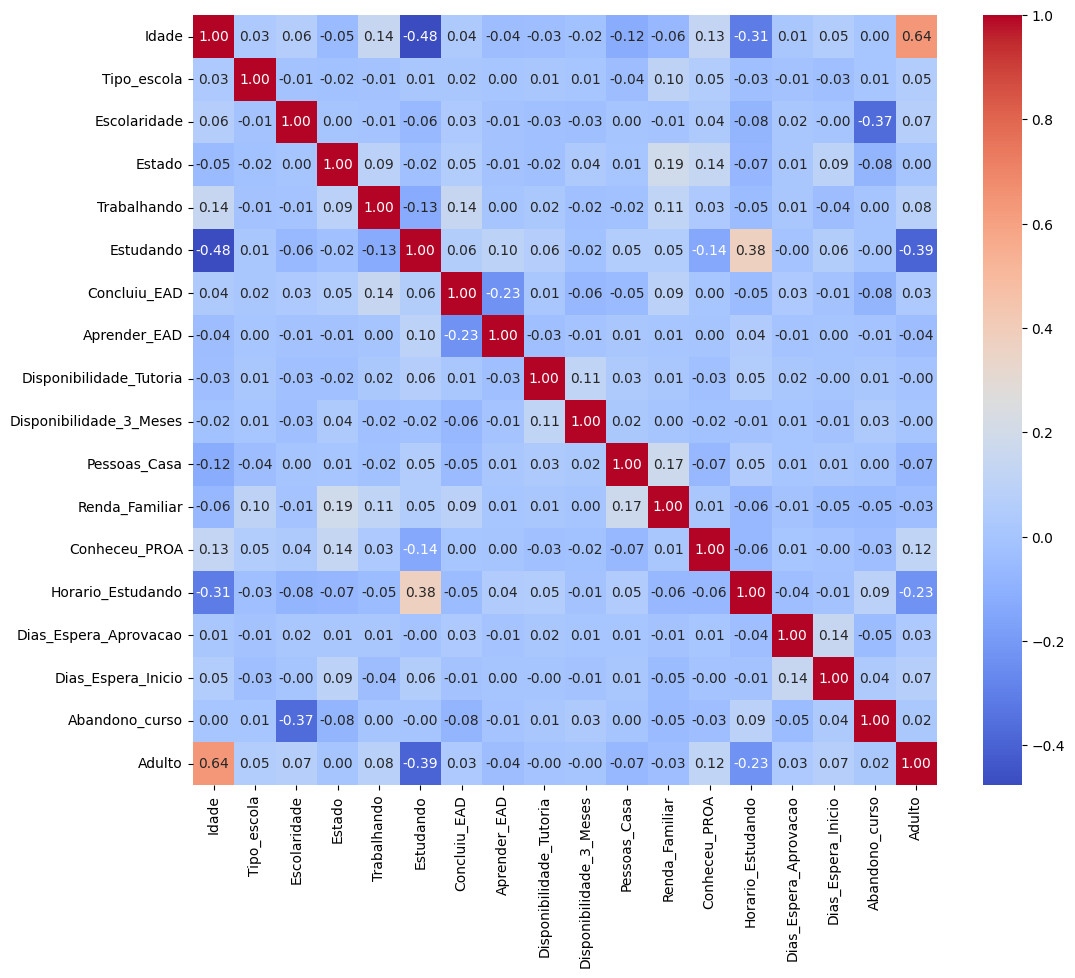

In [131]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_train[numeric_columns].drop(['ID_Aluno'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax);

# Preprocessing

In [132]:
df_train.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Adulto
0,1650,20,0.0,0.0,1.0,Ubatuba,0.0,0.0,0.25,0.666667,...,1.0,0.3,0.0,0.60,0.75,08/10/2022,0.0,100,1,1
1,771,17,0.0,0.0,1.0,São Paulo,0.0,0.5,0.25,0.666667,...,1.0,0.3,0.2,0.90,0.50,26/09/2022,6.0,112,0,0
2,503,22,0.0,0.0,0.0,Queimados,1.0,0.0,0.25,0.333333,...,1.0,0.3,0.4,0.95,0.25,23/09/2022,0.0,115,1,1
3,1586,19,0.0,0.0,1.0,Mogi das Cruzes,0.0,0.0,1.00,0.000000,...,1.0,0.4,0.2,0.60,0.25,07/10/2022,0.0,101,1,1
4,2381,17,1.0,0.0,1.0,São Paulo,0.0,0.5,1.00,0.333333,...,1.0,0.4,0.4,0.35,0.50,24/10/2022,6.0,84,1,0


In [133]:
df_train['Abandono_curso'].value_counts()

Abandono_curso
1    1812
0     688
Name: count, dtype: int64

In [134]:
cols = selected_columns.copy()
cols = ['Idade', 'Escolaridade', 'Estado', 'Horario_Estudando', 'Concluiu_EAD', 'Conheceu_PROA', 'Aprender_EAD', 'Adulto']


#X = df_train.drop(['ID_Aluno','Abandono_curso'], axis=1)
#X = df_balanceado[numeric_columns].drop(['ID_Aluno','Abandono_curso', 'Escolaridade'], axis=1)
X = df_train[cols]
y = df_train['Abandono_curso']

In [135]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# KNN

In [136]:
# Crear la cuadrícula de parámetros para KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],          # Número de vecinos
    'weights': ['uniform', 'distance'],   # Ponderación de los vecinos
    'metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Crear el modelo base KNN
knn_model = KNeighborsClassifier()

# Crear el objeto GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Imprimir los mejores parámetros y el mejor puntaje
print("Mejores Parámetros para KNN:", best_params_knn)
print("Mejor Puntaje para KNN:", best_score_knn)

# Actualizar el modelo con los mejores parámetros
model_knn = KNeighborsClassifier(**best_params_knn)
model_knn.fit(X_train, y_train)


Mejores Parámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor Puntaje para KNN: 0.744


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [137]:
y_train_pred_knn = model_knn.predict(X_train)
y_val_pred_knn = model_knn.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred_knn)
val_accuracy = accuracy_score(y_val, y_val_pred_knn)

print("Train Accuracy:", train_accuracy)
print("Val Accuracy:", val_accuracy)

Train Accuracy: 0.7735
Val Accuracy: 0.722


## SVC

In [138]:
# Crear la cuadrícula de parámetros para SVC
param_grid = {
    'C': [1],              # Regularización
    'gamma': ['scale'],      # Parámetro del kernel
    'kernel': ['rbf']  # Tipos de kernel
}

# Crear el modelo base SVC
svc_model = SVC()

# Crear el objeto GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
grid_search_svc.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

# Imprimir los mejores parámetros y el mejor puntaje
print("Mejores Parámetros para SVC:", best_params_svc)
print("Mejor Puntaje para SVC:", best_score_svc)

# Actualizar el modelo con los mejores parámetros
model_svc = SVC(**best_params_svc)
model_svc.fit(X_train, y_train)


Mejores Parámetros para SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Puntaje para SVC: 0.7295


SVC(C=1)

In [139]:
y_train_pred_svc = model_svc.predict(X_train)
y_val_pred_svc = model_svc.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred_svc)
val_accuracy = accuracy_score(y_val, y_val_pred_svc)

print("Train Accuracy:", train_accuracy)
print("Val Accuracy:", val_accuracy)

Train Accuracy: 0.7295
Val Accuracy: 0.706


## XGBOOST

In [155]:
# Create the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# Create a base model
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model_xgb = xgb.XGBClassifier(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'], gamma=best_params['gamma'], subsample=best_params['subsample'], colsample_bytree=best_params['colsample_bytree'])
model_xgb.fit(X_train, y_train)

Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best Score: 0.788


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [156]:
y_train_pred_xgb = model_xgb.predict(X_train)
y_val_pred_xgb = model_xgb.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
val_accuracy = accuracy_score(y_val, y_val_pred_xgb)

print("Train Accuracy:", train_accuracy)
print("Val Accuracy:", val_accuracy)

Train Accuracy: 0.792
Val Accuracy: 0.784


## Logistic Regression

In [142]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [2000, 3000],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model_lr = LogisticRegression(max_iter=best_params['max_iter'], C=best_params['C'], penalty=best_params['penalty'], random_state=42, solver=best_params['solver'])
model_lr.fit(X_train, y_train)

Best Parameters: {'C': 10, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7815


LogisticRegression(C=10, max_iter=2000, penalty='l1', random_state=42,
                   solver='liblinear')

In [143]:
y_train_pred_lr = model_lr.predict(X_train)
y_val_pred_lr = model_lr.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred_lr)
val_accuracy = accuracy_score(y_val, y_val_pred_lr)

print("Train Accuracy:", train_accuracy)
print("Val Accuracy:", val_accuracy)

Train Accuracy: 0.782
Val Accuracy: 0.776


## Random Forest

In [144]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
model_rf.fit(X_train, y_train)


Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best Score: 0.784


RandomForestClassifier(max_depth=3, random_state=42)

In [145]:
y_train_pred_rf = model_rf.predict(X_train)
y_val_pred_rf = model_rf.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred_rf)
val_accuracy = accuracy_score(y_val, y_val_pred_rf)

print("Train Accuracy:", train_accuracy)
print("Val Accuracy:", val_accuracy)

Train Accuracy: 0.7845
Val Accuracy: 0.784


In [146]:
# Calculate feature importance using Random Forest
importance = model_xgb.feature_importances_

# Create a dataframe to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)


             Feature  Importance
1       Escolaridade    0.587731
3  Horario_Estudando    0.073389
5      Conheceu_PROA    0.072994
2             Estado    0.072795
4       Concluiu_EAD    0.059163
6       Aprender_EAD    0.047421
0              Idade    0.046592
7             Adulto    0.039915


In [147]:
top_10_features = feature_importance_df['Feature'].tolist()
print(top_10_features)

['Escolaridade', 'Horario_Estudando', 'Conheceu_PROA', 'Estado', 'Concluiu_EAD', 'Aprender_EAD', 'Idade', 'Adulto']


# Ensemble

In [148]:
y_train_ensemble = np.array([y_train_pred_xgb])
y_val_ensemble = np.array([y_val_pred_xgb])

y_train_finale = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_train_ensemble)
y_val_finale = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_val_ensemble)

y_train_finale.shape, y_val_finale.shape

((2000,), (500,))

In [149]:
train_accuracy = accuracy_score(y_train, y_train_finale)
val_accuracy = accuracy_score(y_val, y_val_finale)

print("Train Accuracy:", train_accuracy)
print("Val Accuracy:", val_accuracy)

Train Accuracy: 0.7905
Val Accuracy: 0.776


# Submissions

In [157]:
df_test['Adulto'] = df_test['Idade'].apply(lambda x: 1 if x >= 18 else 0)

In [158]:
for column in selected_columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])

In [159]:
df_test[selected_columns] = scaler.transform(df_test[selected_columns])

In [160]:
df_test.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Adulto
0,2,21,0.0,0.00,0.0,Rio de Janeiro,0.0,0.0,0.00,0.000000,...,1.0,0.0,0.2,0.2,0.60,0.50,15/09/2022,1.0,123,1
1,4,18,0.0,0.75,1.0,Osasco,0.0,0.5,0.75,0.333333,...,1.0,0.0,0.4,0.2,0.50,0.75,15/09/2022,3.0,123,1
2,5,19,0.0,0.75,0.0,Rio de Janeiro,0.0,0.0,0.75,0.666667,...,1.0,0.0,0.2,0.2,0.10,0.25,15/09/2022,0.0,123,1
3,6,19,0.0,0.00,1.0,São Paulo,1.0,0.5,0.75,0.333333,...,1.0,0.0,0.1,0.2,0.75,0.25,15/09/2022,82.0,123,1
4,13,18,0.0,0.00,1.0,São Paulo,0.0,0.5,0.50,0.666667,...,1.0,0.0,0.2,0.2,0.50,0.75,15/09/2022,0.0,123,1


In [161]:
#X_test = df_test[numeric_columns[:-1]].drop(['ID_Aluno', 'Escolaridade'], axis=1)
X_test = df_test[cols]
output = df_test[['ID_Aluno']].copy()

In [162]:
output.head()

,ID_Aluno
0,2
1,4
2,5
3,6
4,13


In [163]:
y_test_pred_xgb = model_xgb.predict(X_test)
# y_test_pred_lr = model_lr.predict(X_test)
# y_test_pred_rf = model_rf.predict(X_test)
# y_test_pred_svc = model_svc.predict(X_test)
# y_test_pred_knn = model_knn.predict(X_test)

y_test_ensemble = np.array([y_test_pred_xgb])
y_test_finale = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_test_ensemble)

output.loc[:,'Abandono_curso'] = y_test_finale
output.head()

,ID_Aluno,Abandono_curso
0,2,1
1,4,0
2,5,0
3,6,1
4,13,1


In [164]:
output['Abandono_curso'].value_counts(normalize=True)

Abandono_curso
1    0.932149
0    0.067851
Name: proportion, dtype: float64

In [ ]:
#y_test_pred = model.predict(X_test)

In [ ]:
# output.loc[:,'Abandono_curso'] = y_test_pred
# output.head()

In [ ]:
output.to_csv('outputs/subm_t{}_v{}.csv'.format(train_accuracy, val_accuracy ), index=False)